The following code was adapted from the following sites: 

-> https://www.youtube.com/watch?v=zcq5aw9t-Ds 
-> https://wellsr.com/python/leaf-disease-detection-with-keras-using-convolutional-neural-network/
-> https://github.com/amitjha11/Plant-Disease-Detection-Using-VGG16/blob/master/plant-disease-detection-using-vgg16.ipynb
-> https://github.com/xenon1919/Plant-Disease-Prediction-using-CNN/blob/main/Plant_Disease_Prediction_using_CNN.ipynb
-> https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
!unzip Dataset\ 2_spider.zip

Archive:  Dataset 2_spider.zip
replace Dataset 2_spider/Healthy Leaves/90b29a6de5647627.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
base_dir = '/content/Dataset 2_spider'
cabbage_dir = os.path.join(base_dir, 'Spider Mites')
healthy_dir = os.path.join(base_dir, 'Healthy Leaves')

BATCH_SIZE = 2
IMG_SIZE = (224, 224)
EPOCHS = 20

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.3
)
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 112 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


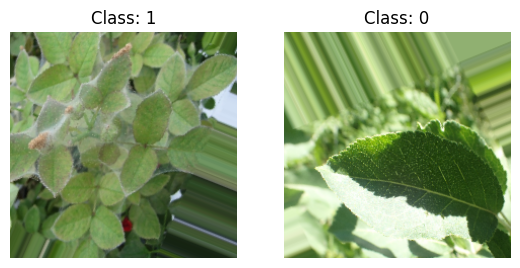

In [ ]:
def plot_images(generator):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(2):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(f"Class: {np.argmax(labels[i])}")
        plt.axis('off')
    plt.show()

plot_images(train_generator)

In [ ]:

num_train_samples = train_generator.samples
num_val_samples = validation_generator.samples

train_steps = max(1, num_train_samples // BATCH_SIZE)
val_steps = max(1, num_val_samples // BATCH_SIZE)

print(f"Number of training samples: {num_train_samples}")
print(f"Number of validation samples: {num_val_samples}")
print(f"Training steps per epoch: {train_steps}")
print(f"Validation steps per epoch: {val_steps}")

Number of training samples: 112
Number of validation samples: 48
Training steps per epoch: 56
Validation steps per epoch: 24


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
train_steps = max(1, (num_train_samples // BATCH_SIZE) - 1)
val_steps = max(1, (num_val_samples // BATCH_SIZE) - 1)

print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")

Training samples: 112
Validation samples: 48


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    validation_data=validation_generator,
    validation_steps=val_steps,
    epochs=EPOCHS
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.5746 - loss: 0.8401 - val_accuracy: 0.7609 - val_loss: 0.5322
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 1.0000 - loss: 0.0889 - val_accuracy: 0.5000 - val_loss: 1.9429
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.7140 - loss: 0.6241 - val_accuracy: 0.8696 - val_loss: 0.3388
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 1.0000 - loss: 0.1258 - val_accuracy: 0.5000 - val_loss: 1.5162
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.7823 - loss: 0.4516 - val_accuracy: 0.8696 - val_loss: 0.3554
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.5000 - loss: 1.7357 - val_accuracy: 0.0000e+00 - val_loss: 1.8595
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.7449 - loss: 0.5382 - val_accuracy: 0.9130 - val_loss: 0.3077
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 1.0000 - loss: 0.0624 - val_accuracy: 0.5000 - val_loss: 1.0713
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.8690 - loss: 0.3508 - val_accuracy: 0.9348 - val_loss: 0.2434
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 1.0000 - loss: 0.0344 - val_accuracy: 1.0000 -

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step


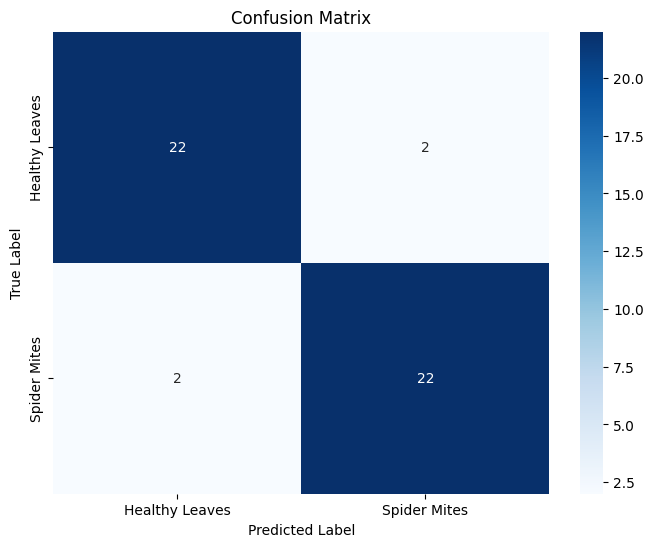

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = validation_generator.classes

class_labels = list(validation_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

image_path = '/content/Dataset 2_spider/Spider Mites/Image_11.jpg'

x = preprocess_image(image_path, target_size=IMG_SIZE)

y_pred = model.predict(x)
predicted_index = np.argmax(y_pred, axis=1)[0]

class_labels = list(validation_generator.class_indices.keys())
predicted_label = class_labels[predicted_index]

print(f"Predicted label: {predicted_label}")
print(f"Prediction confidence: {y_pred[0][predicted_index] * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
Predicted label: Spider Mites
Prediction confidence: 90.08%


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = validation_generator.classes

class_labels = list(validation_generator.class_indices.keys())

report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(report)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step
                precision    recall  f1-score   support

Healthy Leaves       0.96      0.92      0.94        24
  Spider Mites       0.92      0.96      0.94        24

      accuracy                           0.94        48
     macro avg       0.94      0.94      0.94        48
  weighted avg       0.94      0.94      0.94        48



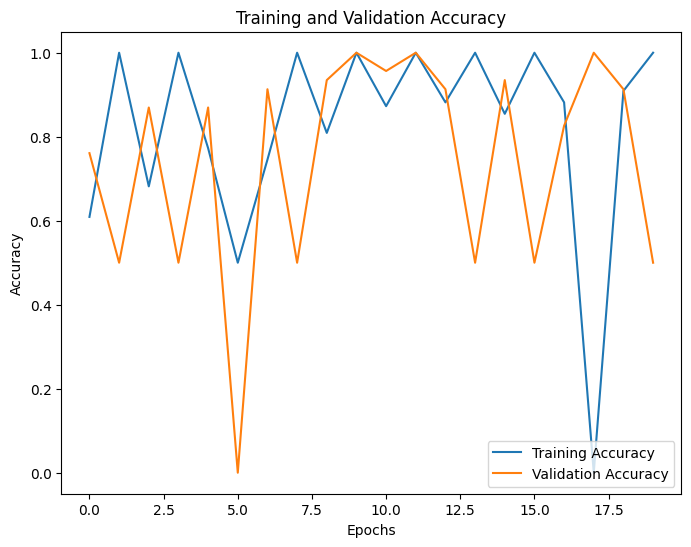

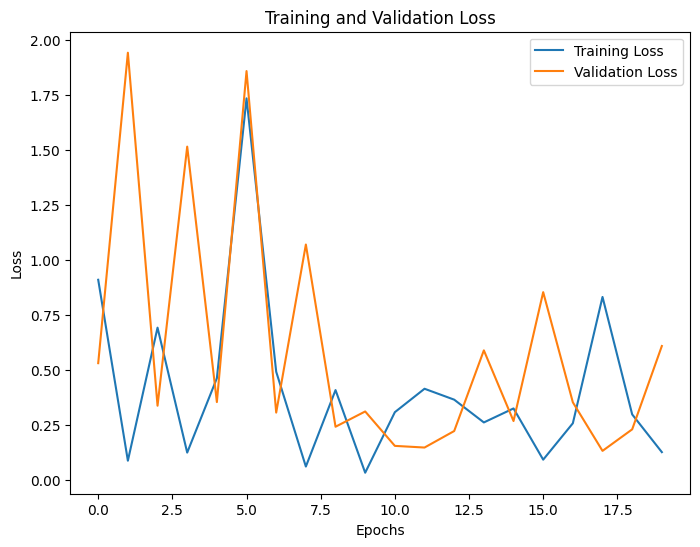

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(accuracy))

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.show()


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step


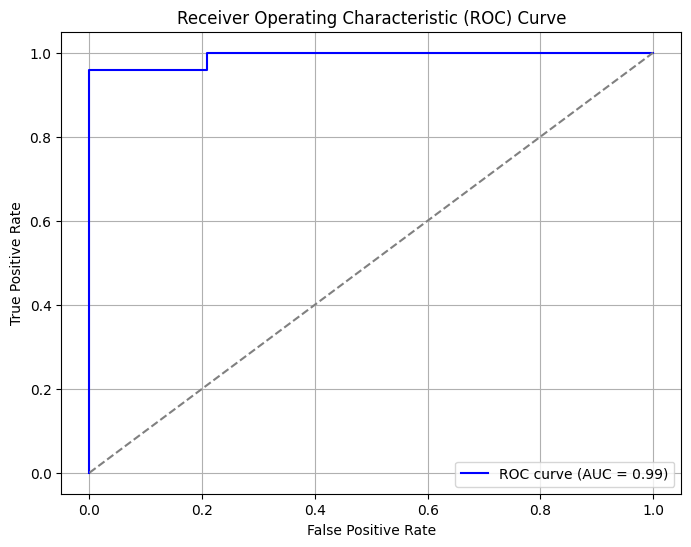

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = model.predict(validation_generator)

y_true = validation_generator.classes
y_pred_positive_class = y_pred_prob[:, 1] 
fpr, tpr, thresholds = roc_curve(y_true, y_pred_positive_class)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model) 
tflite_model = converter.convert()

with open('/content/modelspiderMite.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model successfully saved in Google Colab content folder.")

Saved artifact at '/tmp/tmpsbf8o7h0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_94')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  138229763517856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138230711902528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138234570895280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138233648707920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138230712087680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138230712082928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138230712084688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138230712086624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138230712081696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138230712083104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13823071207

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
class_names = ["Healthy Leaves", "Spider Mites", "Cabbage Loopers"]
def preprocess_images(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.0
    return img_array

model_path = '/content/modelspiderMite.tflite'
image_path = "/content/Dataset 2_spider/Spider Mites/Image_106.jpeg"

interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

image = preprocess_images(image_path)

interpreter.set_tensor(input_details[0]['index'], image)

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_label = np.argmax(output_data)
predicted_class = class_names[predicted_label]

print(f"Predicted Label: {predicted_label}")
print(f"Predicted Class: {predicted_class}")


Predicted Label: 1
Predicted Class: Spider Mites
